In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder




In [ ]:
data_dir='/content/drive/MyDrive/PlantDisease/Data'
categories=os.listdir(data_dir)

images=[]
labels=[]


for category in categories:
    print(category)
    folder_path=os.path.join(data_dir,category)
    for img_file in os.listdir(folder_path):
        img_path=os.path.join(folder_path,img_file)
        img=cv2.imread(img_path)
        if img is not None:
           img=cv2.resize(img,(64,64))
           images.append(img)
           labels.append(category)

images=np.array(images)

Tomato___Early_blight
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_mosaic_virus
Tomato___Target_Spot
Tomato___Late_blight
Tomato___healthy
Tomato___Bacterial_spot


In [ ]:
x=np.array(images)
y=np.array(labels)

print("Labels:",np.unique(y))
print("Data Shape:",x.shape)




Labels: ['Tomato___Bacterial_spot' 'Tomato___Early_blight' 'Tomato___Late_blight'
 'Tomato___Target_Spot' 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
 'Tomato___Tomato_mosaic_virus' 'Tomato___healthy']
Data Shape: (13046, 64, 64, 3)


Class Distribution
Tomato___Tomato_Yellow_Leaf_Curl_Virus    1973
Tomato___healthy                          1953
Tomato___Early_blight                     1930
Tomato___Late_blight                      1871
Tomato___Target_Spot                      1827
Tomato___Tomato_mosaic_virus              1790
Tomato___Bacterial_spot                   1702
Name: count, dtype: int64


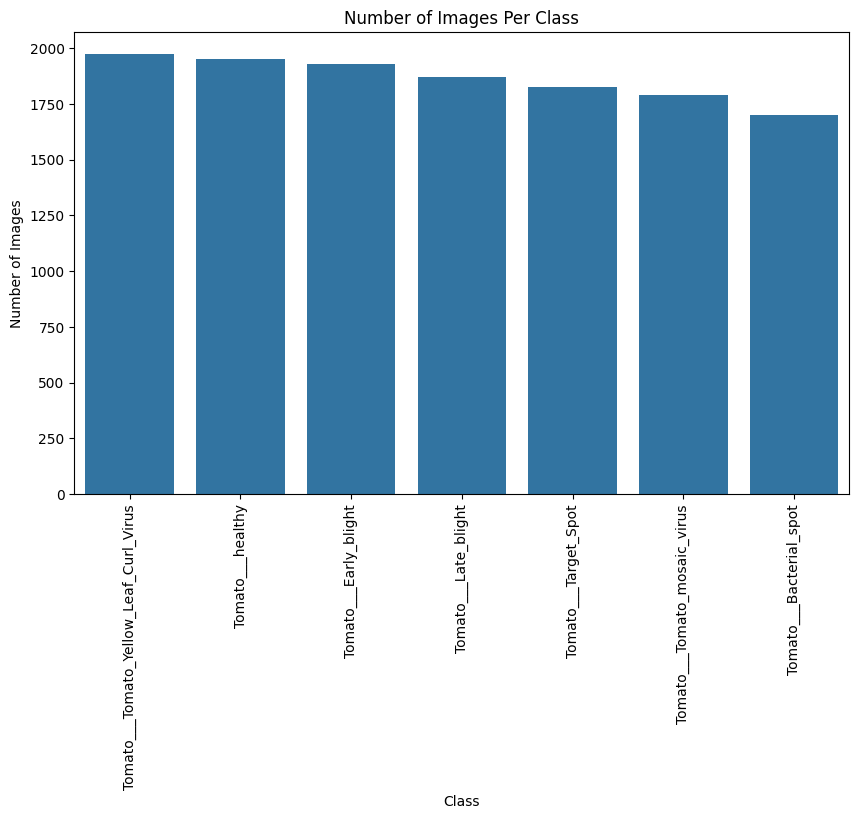

In [ ]:
class_counts=pd.Series(y).value_counts()
print("Class Distribution")
print(class_counts)

# plot class distribution

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x=class_counts.index,y=class_counts.values)
plt.xticks(rotation=90)
plt.title("Number of Images Per Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()





In [ ]:
# remove corrupted images
valid_images=[]
valid_labels=[]

for img, label in zip(x,y):
  if img.shape == (64,64,3):
    valid_images.append(img)
    valid_labels.append(label)

x=np.array(valid_images)
y=np.array(valid_labels)

print("Cleared Data Shape:",x.shape)



Cleared Data Shape: (13046, 64, 64, 3)


In [ ]:
# Encode Labels

le=LabelEncoder()
y_encoded=le.fit_transform(y)


# save class names for later use

class_names=le.classes_
class_names





array(['Tomato___Bacterial_spot', 'Tomato___Early_blight',
       'Tomato___Late_blight', 'Tomato___Target_Spot',
       'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
       'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'], dtype='<U38')

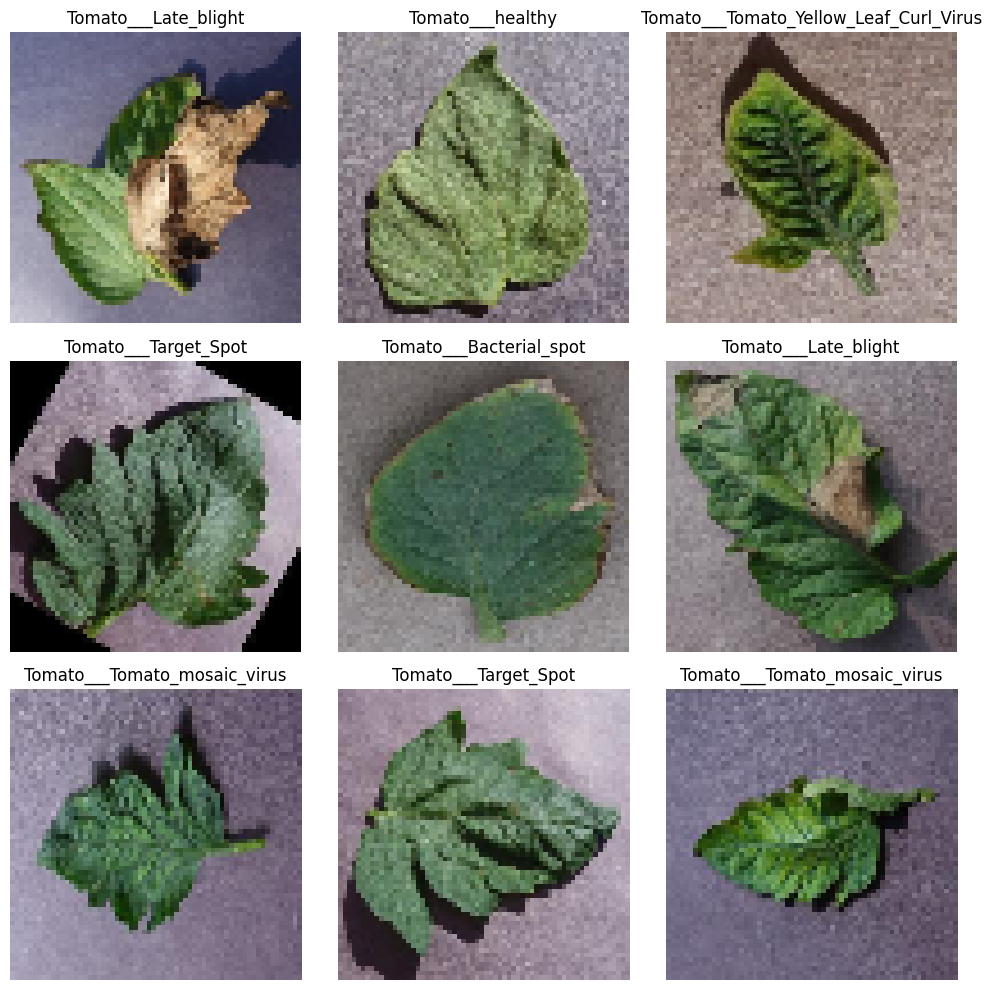

In [ ]:
import random
plt.figure(figsize=(10,10))
for i in range(9):
  idx=random.randint(0,len(x))
  plt.subplot(3,3,i+1)
  plt.imshow(cv2.cvtColor(x[idx],cv2.COLOR_BGR2RGB))
  plt.title(class_names[y_encoded[idx]])
  plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
def extract_color_histogram(image,bins=(8,8,8)):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    hist=cv2.calcHist([image], [0,1,2],None,bins, [0,256,0,256,0,256])
    hist=cv2.normalize(hist,hist).flatten()
    return hist

hist_features=[extract_color_histogram(img) for img in x]
x_features=np.array(hist_features)


In [ ]:
x_features.shape

(13046, 512)

In [ ]:
# choose model

model=SVC(kernel='rbf',C=10,gamma='scale')

In [ ]:
# train/test split

x_train,x_test,y_train,y_test=train_test_split(x_features,y_encoded,test_size=0.2,random_state=42)

# train model
model.fit(x_train,y_train)

# predict

y_pred=model.predict(x_test)

Accuracy: 0.9689655172413794
F1 Score: 0.9689362505575579


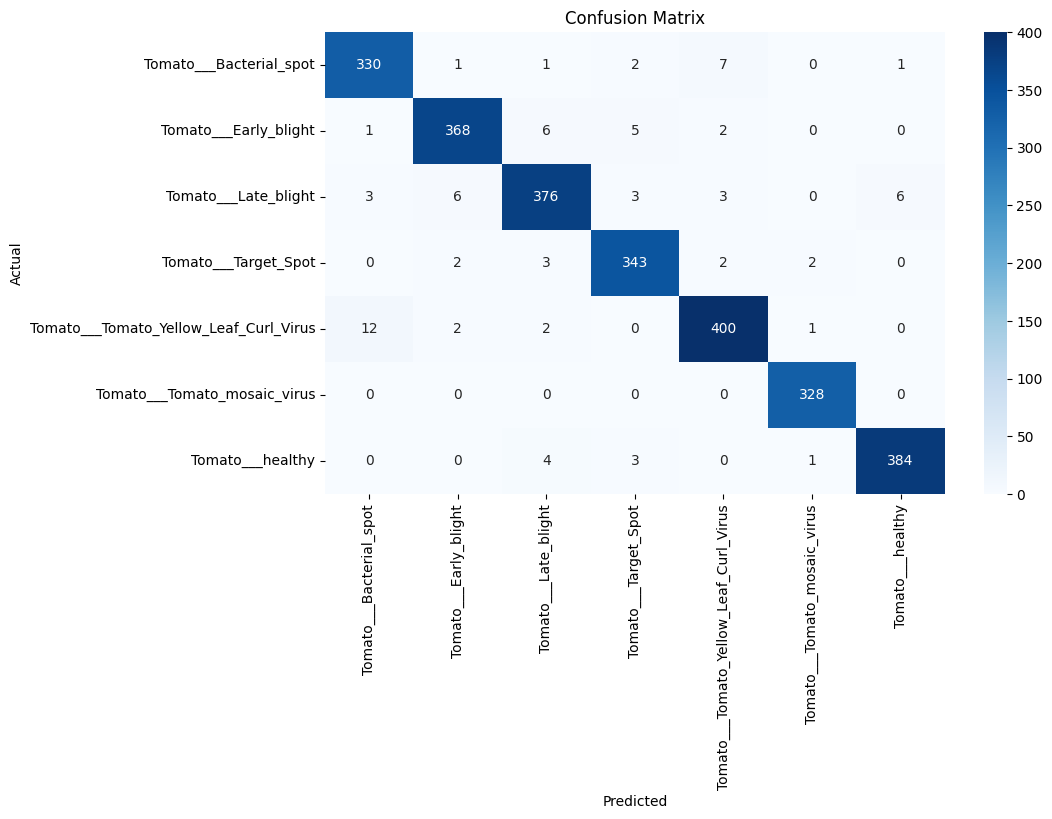

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#f1_score
f1= f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

#plot confusion Matrix
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("\n Classification Report:")
print(classification_report(y_test,y_pred, target_names=class_names))


 Classification Report:
                                        precision    recall  f1-score   support

               Tomato___Bacterial_spot       0.95      0.96      0.96       342
                 Tomato___Early_blight       0.97      0.96      0.97       382
                  Tomato___Late_blight       0.96      0.95      0.95       397
                  Tomato___Target_Spot       0.96      0.97      0.97       352
Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.97      0.96      0.96       417
          Tomato___Tomato_mosaic_virus       0.99      1.00      0.99       328
                      Tomato___healthy       0.98      0.98      0.98       392

                              accuracy                           0.97      2610
                             macro avg       0.97      0.97      0.97      2610
                          weighted avg       0.97      0.97      0.97      2610

